## Exploration and Cleanup

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the data
import pandas as pd 
amazon_df = pd.read_csv("Resources/amz_ca_total_products_data_processed.csv")

amazon_df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",https://m.media-amazon.com/images/I/81cRe0AVC4...,https://www.amazon.ca/dp/B07CV4L6HX,4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,https://m.media-amazon.com/images/I/512CpB-EP5...,https://www.amazon.ca/dp/B09N1HGY74,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,https://m.media-amazon.com/images/I/71P+qLFDFc...,https://www.amazon.ca/dp/B087P7538J,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,https://m.media-amazon.com/images/I/61wfWLZRn-...,https://www.amazon.ca/dp/B0822FF7YQ,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",https://m.media-amazon.com/images/I/61qJG-y1He...,https://www.amazon.ca/dp/B08NTR8NN4,4.2,46,18.99,0.00,Industrial Scientific,False,100


In [4]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2165926 entries, 0 to 2165925
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   asin               object 
 1   title              object 
 2   imgUrl             object 
 3   productURL         object 
 4   stars              float64
 5   reviews            int64  
 6   price              float64
 7   listPrice          float64
 8   categoryName       object 
 9   isBestSeller       bool   
 10  boughtInLastMonth  int64  
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 167.3+ MB


In [5]:
# Drop unnecessary columns 'imgUrl' and 'productURL'
amazon_df2 = amazon_df.drop(['imgUrl', 'productURL'], axis=1)
amazon_df2.shape

(2165926, 9)

In [6]:
#delete of null values
amazon_df2.dropna(subset=['stars', 'reviews', 'price','listPrice','boughtInLastMonth'], how='any', inplace=True)
amazon_df2.shape

(2165926, 9)

In [7]:
#delete of 0 and negative values in the price column
amazon_df2.drop(amazon_df2[amazon_df2['price'] <= 0].index, inplace=True)
amazon_df2

,asin,title,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",4.4,2876,47.69,0.00,Industrial Scientific,False,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,3.8,55,10.99,0.00,Industrial Scientific,False,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,27.99,Industrial Scientific,False,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,30.99,Industrial Scientific,False,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",4.2,46,18.99,0.00,Industrial Scientific,False,100
...,...,...,...,...,...,...,...,...,...
2165921,B0B9Y4PJZ2,"Climbing Rope Net for Kids, Net Climbing Cargo...",0.0,0,52.99,0.00,Play Sets Playground Equipment,False,0
2165922,B0B9XBN868,YIJU Gymnastic Rings Workout Set with Adjustab...,0.0,0,15.99,0.00,Play Sets Playground Equipment,False,0
2165923,B0B9T78NVK,Fancyes 2X Heavy Duty Swing Hangers Hardware S...,0.0,0,15.29,0.00,Play Sets Playground Equipment,False,0
2165924,B0B9T41CCT,SM SunniMix 2Pcs Stainless Steel Swing Hangers...,0.0,0,21.09,0.00,Play Sets Playground Equipment,False,0


In [8]:
#convert false and true to 1 and 0
amazon_df2['isBestSeller'] = amazon_df2['isBestSeller'].astype(int)
amazon_df2

,asin,title,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",4.4,2876,47.69,0.00,Industrial Scientific,0,0
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,3.8,55,10.99,0.00,Industrial Scientific,0,100
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,27.99,Industrial Scientific,0,50
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,30.99,Industrial Scientific,0,100
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",4.2,46,18.99,0.00,Industrial Scientific,0,100
...,...,...,...,...,...,...,...,...,...
2165921,B0B9Y4PJZ2,"Climbing Rope Net for Kids, Net Climbing Cargo...",0.0,0,52.99,0.00,Play Sets Playground Equipment,0,0
2165922,B0B9XBN868,YIJU Gymnastic Rings Workout Set with Adjustab...,0.0,0,15.99,0.00,Play Sets Playground Equipment,0,0
2165923,B0B9T78NVK,Fancyes 2X Heavy Duty Swing Hangers Hardware S...,0.0,0,15.29,0.00,Play Sets Playground Equipment,0,0
2165924,B0B9T41CCT,SM SunniMix 2Pcs Stainless Steel Swing Hangers...,0.0,0,21.09,0.00,Play Sets Playground Equipment,0,0


In [9]:
#Count the number of words each row has in the product description

amazon_df2['word_count'] = amazon_df2['title'].apply(lambda x: len(str(x).split()))
average_word_count = amazon_df2['word_count'].mean()
max_word_count = amazon_df2['word_count'].max()

print(amazon_df2[['title', 'word_count']])
print(f"The average number of words per row in the 'title' column is: {average_word_count:.2f}")

# Shows the maximum number of words in a row
print(f"Maximum number of words in a row: {max_word_count}")

                                                     title  word_count
0        Green Leaf WW3D Wonder Extension Cord Winder, ...          10
1        8pcs Toilet Seat Bumpers Universal Toilet Repl...          22
2        YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...          28
3        LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...          23
4        Lightbeam 16" Long Stem Deep Fry Thermometer w...          25
...                                                    ...         ...
2165921  Climbing Rope Net for Kids, Net Climbing Cargo...          25
2165922  YIJU Gymnastic Rings Workout Set with Adjustab...          16
2165923  Fancyes 2X Heavy Duty Swing Hangers Hardware S...          14
2165924  SM SunniMix 2Pcs Stainless Steel Swing Hangers...          22
2165925  YIJU 2Pcs Swing Hangers Sandbag Hook Hardware ...          22

[1988016 rows x 2 columns]
The average number of words per row in the 'title' column is: 18.55
Maximum number of words in a row: 305


In [10]:
# Function to extract colors using regular expressions
def extract_colors(texto):
    if pd.isna(texto):  # Handle null values
        return []
    elif not isinstance(texto, str):  # Handle non-string values
        return []
    else:
        return re.findall(r'\b(red|blue|green|yellow|purple|orange|pink|brown|black|white)\b', texto.lower())

# Apply the function and count the frequency of each color
colors = amazon_df2['title'].apply(extract_colors)
colors = [color for colors_list in colors for color in colors_list]  
colors_count = Counter(colors)


top_10_colors = colors_count.most_common(10)

print("Top 10 colors:")
for color, frecuencia in top_10_colors:
    print(f"{color}: {frecuencia} repetitions")
    
    


Top 10 colors:
black: 191900 repetitions
white: 87718 repetitions
blue: 64041 repetitions
red: 43483 repetitions
green: 34512 repetitions
pink: 29015 repetitions
brown: 19704 repetitions
yellow: 18684 repetitions
purple: 12849 repetitions
orange: 12205 repetitions


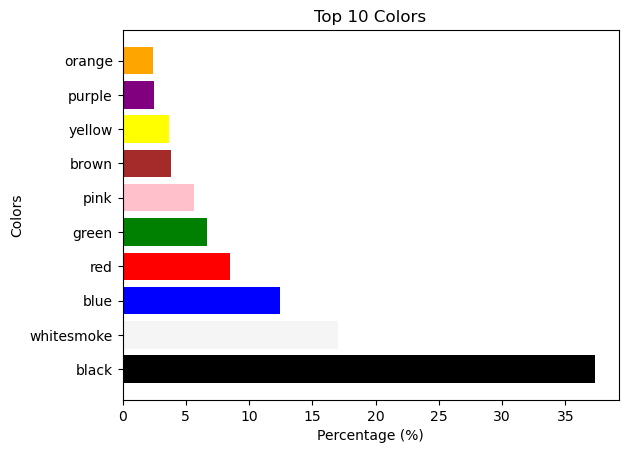

In [18]:
colors = ['black', 'whitesmoke', 'blue', 'red', 'green', 'pink', 'brown', 'yellow', 'purple', 'orange']
repetitions = [191900, 87718, 64041, 43483, 34512, 29015, 19704, 18684, 12849, 12205]

# calculate percentages
total_repetitions = sum(repetitions)
percentages = [(repetition / total_repetitions) * 100 for repetition in repetitions]


fig, ax = plt.subplots()
ax.barh(colors, percentages, color=colors)


ax.set_xlabel('Percentage (%)')
ax.set_ylabel('Colors')
ax.set_title('Top 10 Colors')

plt.show()

In [59]:
# determine the number of rows where values are greater than 0 in column boughtInLastMonth and listPrice
value1_greater_than_0 = (amazon_df2['boughtInLastMonth'] > 0).sum()
value2_greater_than_0 = (amazon_df2['listPrice'] > 0).sum()

print(f"Number of rows with values greater than 0 in the column'{'boughtInLastMonth'}': {value1_greater_than_0}")
print(f"Number of rows with values greater than 0 in the column'{'listPrice'}': {value2_greater_than_0}")

Number of rows with values greater than 0 in the column'boughtInLastMonth': 106637
Number of rows with values greater than 0 in the column'listPrice': 166649


In [60]:
# Calculate the discount percentage, avoiding divisions by zero
amazon_df2['discount'] = np.where(amazon_df2['listPrice'] != 0,
                        ((amazon_df2['listPrice'] - amazon_df2['price']) / amazon_df2['listPrice']) * 100, 0)
amazon_df2

,asin,title,stars,reviews,price,listPrice,categoryName,isBestSeller,boughtInLastMonth,word_count,discount
0,B07CV4L6HX,"Green Leaf WW3D Wonder Extension Cord Winder, ...",4.4,2876,47.69,0.00,Industrial Scientific,0,0,10,0.000000
1,B09N1HGY74,8pcs Toilet Seat Bumpers Universal Toilet Repl...,3.8,55,10.99,0.00,Industrial Scientific,0,100,22,0.000000
2,B087P7538J,YaeCCC 19 Pcs Hole Saw Kit 3/4''(19mm)- 6''(15...,4.0,126,25.99,27.99,Industrial Scientific,0,50,28,7.145409
3,B0822FF7YQ,LLPT Butyl Putty Tape White 1 Inch x 33Ft Tigh...,4.5,1936,21.99,30.99,Industrial Scientific,0,100,23,29.041626
4,B08NTR8NN4,"Lightbeam 16"" Long Stem Deep Fry Thermometer w...",4.2,46,18.99,0.00,Industrial Scientific,0,100,25,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2165921,B0B9Y4PJZ2,"Climbing Rope Net for Kids, Net Climbing Cargo...",0.0,0,52.99,0.00,Play Sets Playground Equipment,0,0,25,0.000000
2165922,B0B9XBN868,YIJU Gymnastic Rings Workout Set with Adjustab...,0.0,0,15.99,0.00,Play Sets Playground Equipment,0,0,16,0.000000
2165923,B0B9T78NVK,Fancyes 2X Heavy Duty Swing Hangers Hardware S...,0.0,0,15.29,0.00,Play Sets Playground Equipment,0,0,14,0.000000
2165924,B0B9T41CCT,SM SunniMix 2Pcs Stainless Steel Swing Hangers...,0.0,0,21.09,0.00,Play Sets Playground Equipment,0,0,22,0.000000


In [61]:
amazon_df3 = amazon_df2.drop(['asin', 'title', 'listPrice'], axis=1)
amazon_df3

,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth,word_count,discount
0,4.4,2876,47.69,Industrial Scientific,0,0,10,0.000000
1,3.8,55,10.99,Industrial Scientific,0,100,22,0.000000
2,4.0,126,25.99,Industrial Scientific,0,50,28,7.145409
3,4.5,1936,21.99,Industrial Scientific,0,100,23,29.041626
4,4.2,46,18.99,Industrial Scientific,0,100,25,0.000000
...,...,...,...,...,...,...,...,...
2165921,0.0,0,52.99,Play Sets Playground Equipment,0,0,25,0.000000
2165922,0.0,0,15.99,Play Sets Playground Equipment,0,0,16,0.000000
2165923,0.0,0,15.29,Play Sets Playground Equipment,0,0,14,0.000000
2165924,0.0,0,21.09,Play Sets Playground Equipment,0,0,22,0.000000


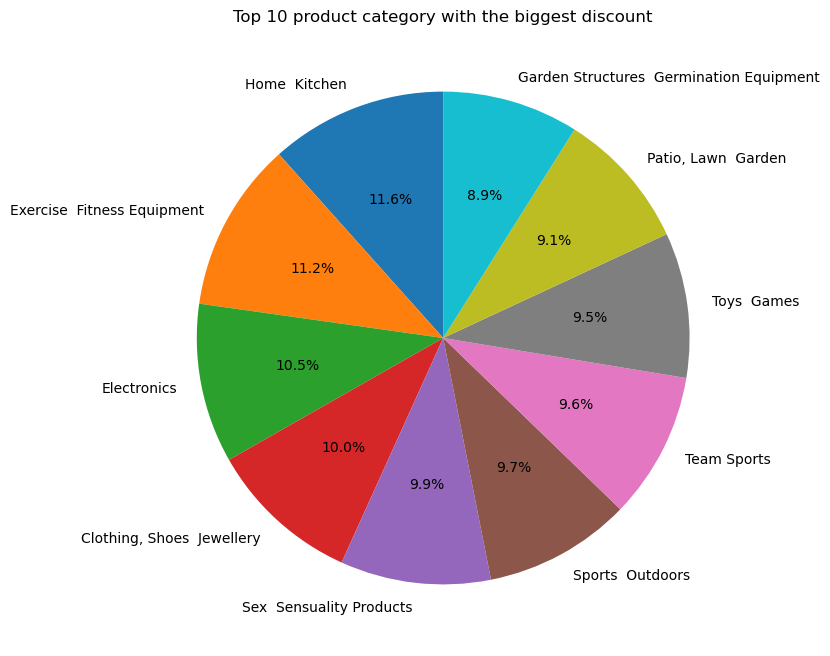

In [63]:
# Calculate the top 10 categories with the greatest discount
top_10_discount = amazon_df3.groupby('categoryName')['discount'].mean().nlargest(10)


plt.figure(figsize=(8, 8))
plt.pie(top_10_discount, labels=top_10_discount.index, autopct='%1.1f%%', startangle=90)

plt.title('Top 10 product category with the biggest discount')
plt.show()

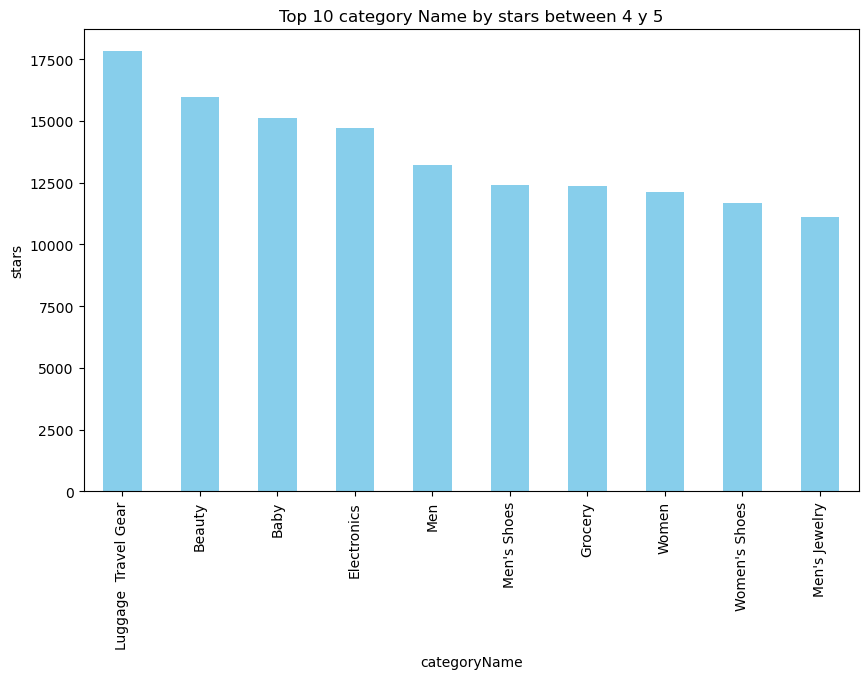

In [64]:
# Filter rows with stars between 4 and 5
df_stars = amazon_df3[(amazon_df3['stars'] >= 4) & (amazon_df3['stars'] <= 5)]

# determine the Calculate the top 10 product category

top_product = df_stars.groupby('categoryName')['stars'].count().nlargest(10)

plt.figure(figsize=(10, 6))
top_product.plot(kind='bar', color='skyblue')

plt.xlabel('categoryName')
plt.ylabel('stars')
plt.title('Top 10 category Name by stars between 4 y 5')
plt.show()

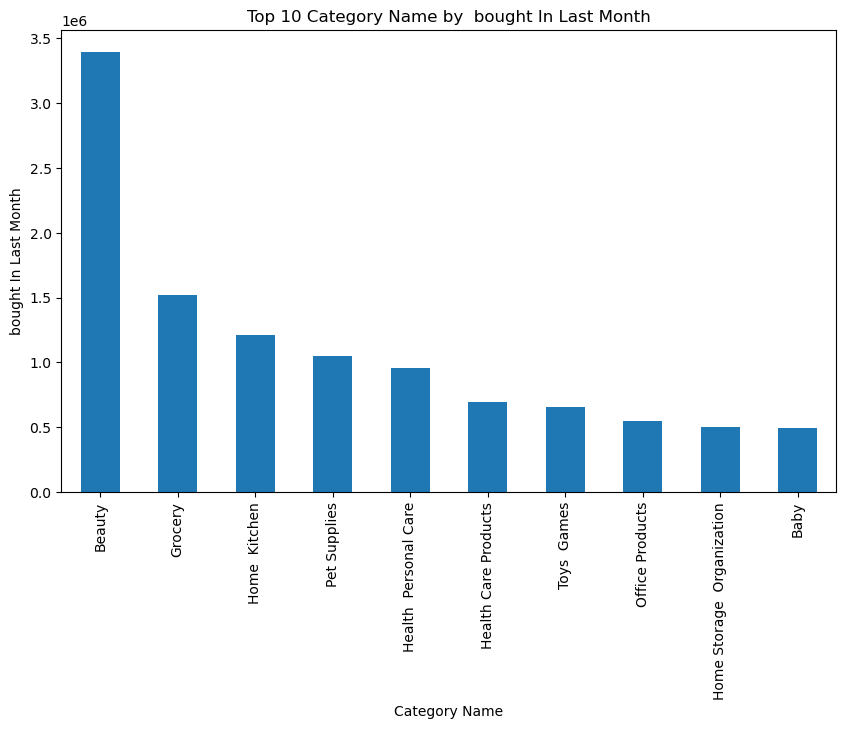

In [65]:
df_bought = amazon_df3[amazon_df3['boughtInLastMonth'] > 0]

# Calcular el top 10 de categorías
top_categoryName = df_bought.groupby('categoryName')['boughtInLastMonth'].sum().nlargest(10)

# Graficar
plt.figure(figsize=(10, 6))
top_categoryName.plot(kind='bar')

plt.xlabel('Category Name')
plt.ylabel('bought In Last Month')
plt.title('Top 10 Category Name by  bought In Last Month')
plt.show()

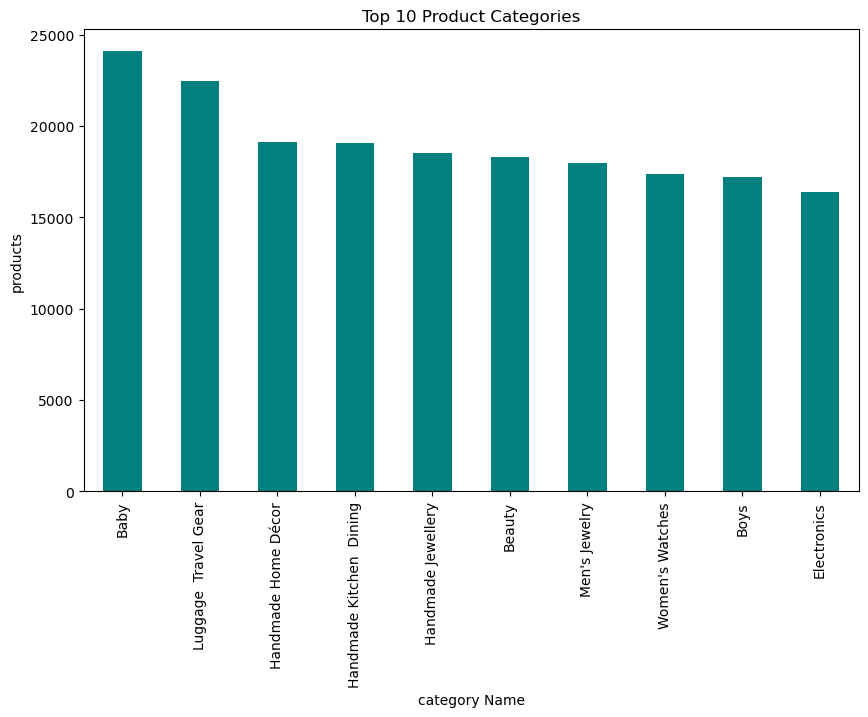

In [66]:
# Get the top 10 categories according to the number of products
top_10_categorias = amazon_df3['categoryName'].value_counts().nlargest(10)


plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='bar', color='teal')
plt.title('Top 10 Product Categories')
plt.xlabel('category Name')
plt.ylabel('products')
plt.show()

In [67]:
amazon_df3

,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth,word_count,discount
0,4.4,2876,47.69,Industrial Scientific,0,0,10,0.000000
1,3.8,55,10.99,Industrial Scientific,0,100,22,0.000000
2,4.0,126,25.99,Industrial Scientific,0,50,28,7.145409
3,4.5,1936,21.99,Industrial Scientific,0,100,23,29.041626
4,4.2,46,18.99,Industrial Scientific,0,100,25,0.000000
...,...,...,...,...,...,...,...,...
2165921,0.0,0,52.99,Play Sets Playground Equipment,0,0,25,0.000000
2165922,0.0,0,15.99,Play Sets Playground Equipment,0,0,16,0.000000
2165923,0.0,0,15.29,Play Sets Playground Equipment,0,0,14,0.000000
2165924,0.0,0,21.09,Play Sets Playground Equipment,0,0,22,0.000000


In [68]:
#filter the dataset with the top 10 product categories that had sales in the last month
categories_interest = ['Beauty', 'Grocery', 'Home  Kitchen', 'Pet Supplies', 'Health  Personal Care', 'Health Care Products', 'Toys  Games', 'Office Products', 'Home Storage  Organization', 'Baby']

amz_filtered_df = amazon_df3[amazon_df3['categoryName'].isin(categories_interest)]

amz_filtered_df

,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth,word_count,discount
267597,4.3,4599,45.99,Beauty,0,300,20,0.000000
267598,4.4,38384,49.95,Beauty,0,700,25,16.680567
267599,4.6,2547,22.00,Beauty,0,50,6,0.000000
267600,4.3,5607,45.99,Beauty,1,1000,31,16.366612
267601,4.5,1593,87.97,Beauty,1,10000,14,0.000000
...,...,...,...,...,...,...,...,...
2074088,4.1,134,45.99,Health Personal Care,0,100,25,0.000000
2074089,4.5,61,53.99,Health Personal Care,0,100,29,0.000000
2074090,4.9,115,49.99,Health Personal Care,0,100,22,0.000000
2074091,4.4,232,84.99,Health Personal Care,0,100,17,0.000000


In [69]:
category_name = amz_filtered_df['categoryName'].unique()
print(category_name)

['Beauty' 'Office Products' 'Pet Supplies' 'Home Storage  Organization'
 'Home  Kitchen' 'Baby' 'Grocery' 'Toys  Games' 'Health Care Products'
 'Health  Personal Care']


In [70]:
# find outliers in the price

price = amz_filtered_df['price']
quartiles = price.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price is: {lowerq}")
print(f"The upper quartile of price is: {upperq}")
print(f"The interquartile range of price is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price is: 13.99
The upper quartile of price is: 34.85
The interquartile range of price is: 20.86
The the median of price is: 21.66 
Values below -17.299999999999997 could be outliers.
Values above 66.14 could be outliers.


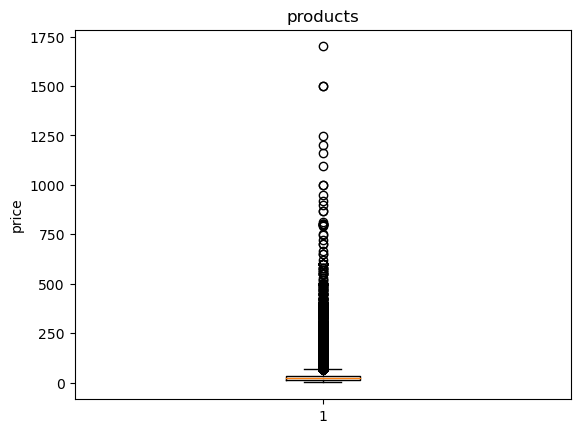

In [71]:

fig1, ax1 = plt.subplots()
ax1.set_title('products')
ax1.set_ylabel('price')
ax1.boxplot(price)
plt.show()

In [72]:
#remove outliers in column 'price'
# Calculate the interquartile range (IQR) of the column 'price'
Q1 = amz_filtered_df['price'].quantile(0.25)
Q3 = amz_filtered_df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers

df_no_outliers = amz_filtered_df[(amz_filtered_df['price'] >= lower_limit) & (amz_filtered_df['price'] <= upper_limit)]
df_no_outliers

,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth,word_count,discount
267597,4.3,4599,45.99,Beauty,0,300,20,0.000000
267598,4.4,38384,49.95,Beauty,0,700,25,16.680567
267599,4.6,2547,22.00,Beauty,0,50,6,0.000000
267600,4.3,5607,45.99,Beauty,1,1000,31,16.366612
267602,4.4,834,18.90,Beauty,1,10000,9,0.000000
...,...,...,...,...,...,...,...,...
2074087,4.4,103,61.95,Health Personal Care,0,100,15,0.000000
2074088,4.1,134,45.99,Health Personal Care,0,100,25,0.000000
2074089,4.5,61,53.99,Health Personal Care,0,100,29,0.000000
2074090,4.9,115,49.99,Health Personal Care,0,100,22,0.000000


In [73]:
# find outliers in reviews

reviews = df_no_outliers['reviews']
quartiles = reviews.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of reviews is: {lowerq}")
print(f"The upper quartile of reviews is: {upperq}")
print(f"The interquartile range of reviews is: {iqr}")
print(f"The the median of price is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of reviews is: 18.0
The upper quartile of reviews is: 998.0
The interquartile range of reviews is: 980.0
The the median of price is: 169.0 
Values below -1452.0 could be outliers.
Values above 2468.0 could be outliers.


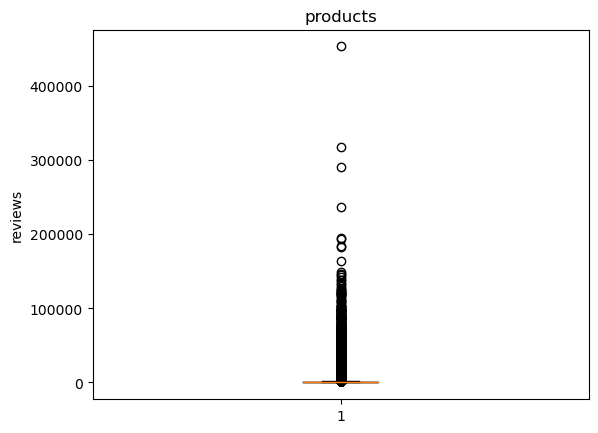

In [74]:
fig1, ax1 = plt.subplots()
ax1.set_title('products')
ax1.set_ylabel('reviews')
ax1.boxplot(reviews)
plt.show()

In [77]:
#remove outliers in column 'reviews'
# Calculate the interquartile range (IQR) of the column 'price'
Q1 = amz_filtered_df['reviews'].quantile(0.25)
Q3 = amz_filtered_df['reviews'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


df_no_outliers2 = df_no_outliers[(df_no_outliers['reviews'] >= lower_limit) & (df_no_outliers['reviews'] <= upper_limit)]
df_no_outliers2

,stars,reviews,price,categoryName,isBestSeller,boughtInLastMonth,word_count,discount
267602,4.4,834,18.90,Beauty,1,10000,9,0.0
267608,4.3,1928,11.97,Beauty,1,9000,8,0.0
267611,4.6,2066,11.99,Beauty,1,9000,20,0.0
267613,4.7,2474,38.00,Beauty,1,7000,25,0.0
267619,4.2,1062,28.99,Beauty,0,0,28,0.0
...,...,...,...,...,...,...,...,...
2074087,4.4,103,61.95,Health Personal Care,0,100,15,0.0
2074088,4.1,134,45.99,Health Personal Care,0,100,25,0.0
2074089,4.5,61,53.99,Health Personal Care,0,100,29,0.0
2074090,4.9,115,49.99,Health Personal Care,0,100,22,0.0


In [78]:
#export the final dataset to a csv
df_no_outliers2.to_csv("amz_ca_clean_8.csv", index=False)